In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join

import sys
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice
import matplotlib as mpl
import matplotlib.pyplot as plt

# Particle position histogram

    First, I will read the .lammpstrj of all the simulations and convert those to col_trj. After that I will save only the last frame, since the whole dataframe uses a lot of memory.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-5.0"

In [3]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, "ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp*.lammpstrj"):
        print(file)
        load_obj = mgc.trj_lazyread(os.path.join(data_directory,file),
                                                    output = ["x","y","z","mux","muy","muz"]) 
        bnd = load_obj.get_bounds()
        trj = load_obj.read_trj()
        col_trj = ice.get_ice_trj(trj,bnd, atom_types = 1, trap_types = [2,3])
        Cairo.append(col_trj)
        
    
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)
    

ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp14.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp13.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp17.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp10.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp16.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp18.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp19.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp15.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp12.lammpstrj
ACI_CairoLattice_50mT-2400s_1cycle_CondD_l10_exp11.lammpstrj


In [4]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [5]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [35]:
last_frame = Cairo_exp.query('frame == 120000')

In [36]:
last_frame.to_csv(join(data_directory,"col_trj_lastFrame_120000.dat"), sep = "\t")

    Now, I will import the col_trj_lasFrame file

In [2]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join

import sys
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-5.0"

In [4]:
col_trj = pd.read_csv(join(data_directory,"col_trj_lastFrame_120000.dat"), sep = "\t", index_col = [0,1,2])

In [5]:
col_trj = col_trj.reset_index()
del col_trj['Exp']
col_trj = col_trj.set_index(['frame','id'])
col_trj

type         x         y    z       dx       dy   dz        cx  \
frame  id                                                                     
120000 0        2  -16.0461   10.8655  0.0 -5.00000  8.66025  0.0 -1.163300   
       1        2  -10.8655   30.3059  0.0 -8.66025 -5.00000 -0.0 -1.994599   
       2        2   10.8655   30.3059  0.0 -8.66025  5.00000  0.0 -1.469251   
       3        2   16.0461   10.8655  0.0 -5.00000 -8.66025 -0.0 -0.470800   
       4        2   16.0461  -10.8655  0.0  5.00000 -8.66025  0.0  0.073299   
...           ...       ...       ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.8510  0.0 -5.00000 -8.66025 -0.0 -1.401978   
       1996     3  896.1930 -891.5820  0.0  5.00000 -8.66025  0.0  2.393005   
       1997     3  915.6340 -864.6700  0.0  8.66025 -5.00000  0.0  4.447998   
       1998     3  910.4250 -845.2010  0.0  5.00000  8.66025  0.0  2.554993   
       1999     3  891.0130 -818.3180  0.0  8.66025  5.00000  0.0  3.809998   

                   cy   cz  
frame  id                   
120000 0     1.840300  0.0  
       1    -0.935801  0.0  
       2     0.752499  0.0  
       3    -0.666600  0.0  
       4    -0.008400  0.0  
...               ...  ...  
       1995 -2.292969  0.0  
       1996 -4.473022  0.0  
       1997 -2.618042  0.0  
       1998  4.377014  0.0  
       1999  2.218994  0.0  

[20000 rows x 10 columns]

In [6]:
last_frame = 120000

(-100, -300)

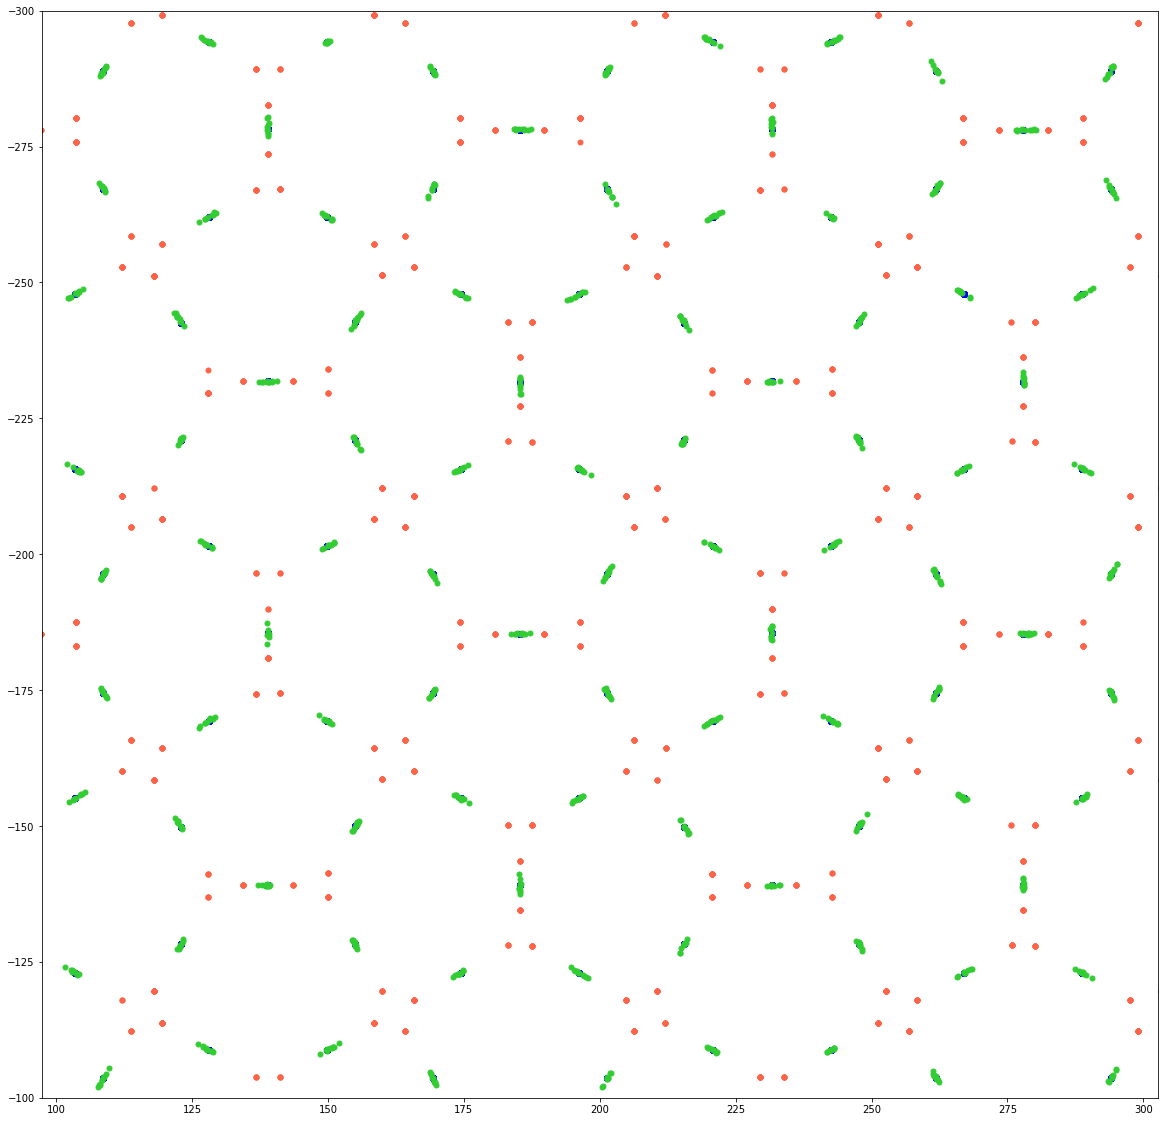

In [7]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(col_trj.loc[last_frame].x,col_trj.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(col_trj.loc[last_frame].x+col_trj.loc[last_frame].cx,
         col_trj.loc[last_frame].y+col_trj.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(col_trj.loc[last_frame].x+col_trj.loc[last_frame].dx,
         col_trj.loc[last_frame].y+col_trj.loc[last_frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [8]:
col_trj

type         x         y    z       dx       dy   dz        cx  \
frame  id                                                                     
120000 0        2  -16.0461   10.8655  0.0 -5.00000  8.66025  0.0 -1.163300   
       1        2  -10.8655   30.3059  0.0 -8.66025 -5.00000 -0.0 -1.994599   
       2        2   10.8655   30.3059  0.0 -8.66025  5.00000  0.0 -1.469251   
       3        2   16.0461   10.8655  0.0 -5.00000 -8.66025 -0.0 -0.470800   
       4        2   16.0461  -10.8655  0.0  5.00000 -8.66025  0.0  0.073299   
...           ...       ...       ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.8510  0.0 -5.00000 -8.66025 -0.0 -1.401978   
       1996     3  896.1930 -891.5820  0.0  5.00000 -8.66025  0.0  2.393005   
       1997     3  915.6340 -864.6700  0.0  8.66025 -5.00000  0.0  4.447998   
       1998     3  910.4250 -845.2010  0.0  5.00000  8.66025  0.0  2.554993   
       1999     3  891.0130 -818.3180  0.0  8.66025  5.00000  0.0  3.809998   

                   cy   cz  
frame  id                   
120000 0     1.840300  0.0  
       1    -0.935801  0.0  
       2     0.752499  0.0  
       3    -0.666600  0.0  
       4    -0.008400  0.0  
...               ...  ...  
       1995 -2.292969  0.0  
       1996 -4.473022  0.0  
       1997 -2.618042  0.0  
       1998  4.377014  0.0  
       1999  2.218994  0.0  

[20000 rows x 10 columns]

In [9]:
type2 = col_trj.query('dx == 0 or dy == 0')
type3 = col_trj.query('dx == 5 or dy == 5 or dx == -5 or dy == -5')

In [10]:
type3

type         x         y    z       dx       dy   dz        cx  \
frame  id                                                                     
120000 0        2  -16.0461   10.8655  0.0 -5.00000  8.66025  0.0 -1.163300   
       1        2  -10.8655   30.3059  0.0 -8.66025 -5.00000 -0.0 -1.994599   
       2        2   10.8655   30.3059  0.0 -8.66025  5.00000  0.0 -1.469251   
       3        2   16.0461   10.8655  0.0 -5.00000 -8.66025 -0.0 -0.470800   
       4        2   16.0461  -10.8655  0.0  5.00000 -8.66025  0.0  0.073299   
...           ...       ...       ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.8510  0.0 -5.00000 -8.66025 -0.0 -1.401978   
       1996     3  896.1930 -891.5820  0.0  5.00000 -8.66025  0.0  2.393005   
       1997     3  915.6340 -864.6700  0.0  8.66025 -5.00000  0.0  4.447998   
       1998     3  910.4250 -845.2010  0.0  5.00000  8.66025  0.0  2.554993   
       1999     3  891.0130 -818.3180  0.0  8.66025  5.00000  0.0  3.809998   

                   cy   cz  
frame  id                   
120000 0     1.840300  0.0  
       1    -0.935801  0.0  
       2     0.752499  0.0  
       3    -0.666600  0.0  
       4    -0.008400  0.0  
...               ...  ...  
       1995 -2.292969  0.0  
       1996 -4.473022  0.0  
       1997 -2.618042  0.0  
       1998  4.377014  0.0  
       1999  2.218994  0.0  

[16000 rows x 10 columns]

(-100, -300)

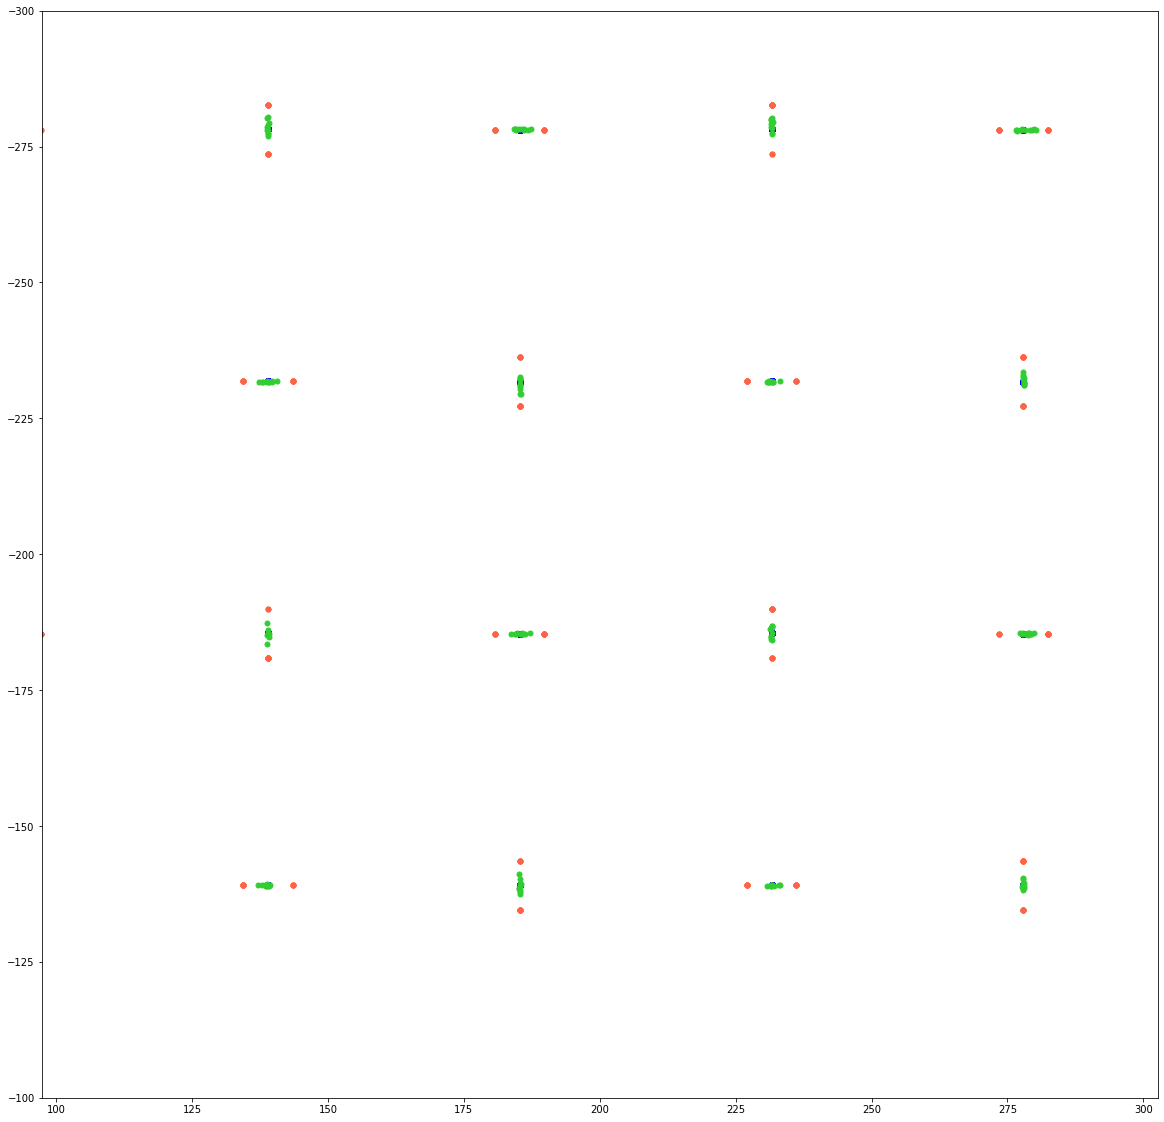

In [11]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type2.loc[last_frame].x,type2.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(type2.loc[last_frame].x+type2.loc[last_frame].cx,
         type2.loc[last_frame].y+type2.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type2.loc[last_frame].x+type2.loc[last_frame].dx,
        type2.loc[last_frame].y+type2.loc[last_frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [12]:
type2_v = type2.query('dy == 0 or dy == -0')
type2_h = type2.query('dx == 0 or dx == -0')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdc5f63aed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc5f63aed0>)

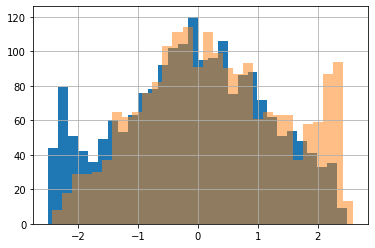

In [13]:
type2_v.loc[last_frame]['cx'].hist(bins = 30), type2_h.loc[last_frame]['cy'].hist(bins = 30, alpha = 0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdc5f557d10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdc5f557d10>)

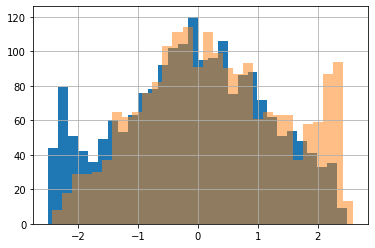

In [14]:
type2_v['cx'].hist(bins = 30), type2_h['cy'].hist(bins = 30, alpha = 0.5)

(-100, -300)

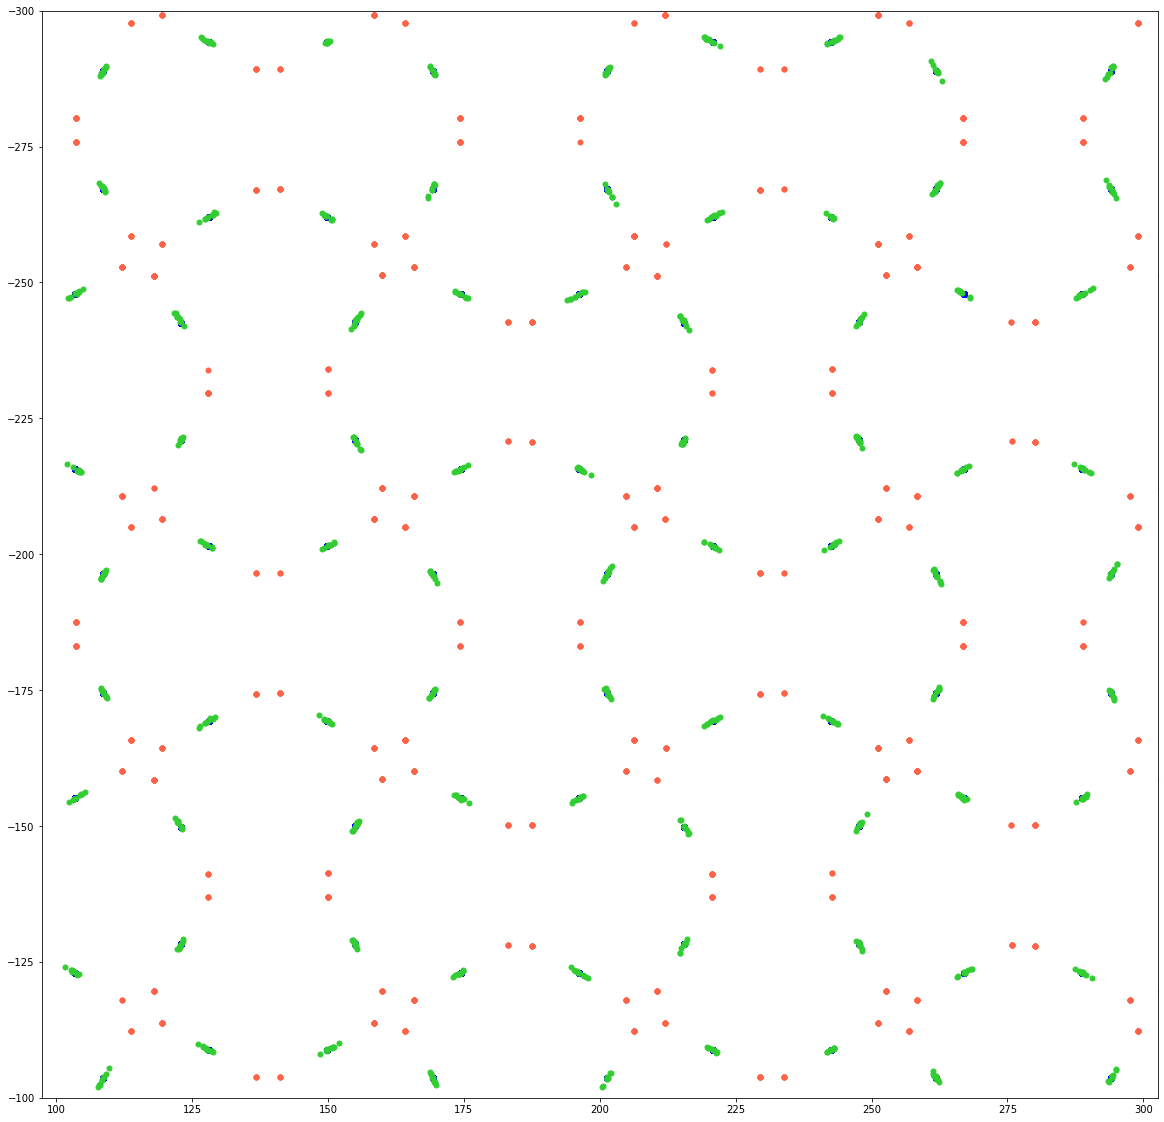

In [15]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type3.loc[last_frame].x,type3.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(type3.loc[last_frame].x+type3.loc[last_frame].cx,
         type3.loc[last_frame].y+type3.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3.loc[last_frame].x+type3.loc[last_frame].dx,
         type3.loc[last_frame].y+type3.loc[last_frame].dy, '.', markersize = 10, color ="tomato")
plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [16]:
type3

type         x         y    z       dx       dy   dz        cx  \
frame  id                                                                     
120000 0        2  -16.0461   10.8655  0.0 -5.00000  8.66025  0.0 -1.163300   
       1        2  -10.8655   30.3059  0.0 -8.66025 -5.00000 -0.0 -1.994599   
       2        2   10.8655   30.3059  0.0 -8.66025  5.00000  0.0 -1.469251   
       3        2   16.0461   10.8655  0.0 -5.00000 -8.66025 -0.0 -0.470800   
       4        2   16.0461  -10.8655  0.0  5.00000 -8.66025  0.0  0.073299   
...           ...       ...       ...  ...      ...      ...  ...       ...   
       1995     3  896.1930 -869.8510  0.0 -5.00000 -8.66025 -0.0 -1.401978   
       1996     3  896.1930 -891.5820  0.0  5.00000 -8.66025  0.0  2.393005   
       1997     3  915.6340 -864.6700  0.0  8.66025 -5.00000  0.0  4.447998   
       1998     3  910.4250 -845.2010  0.0  5.00000  8.66025  0.0  2.554993   
       1999     3  891.0130 -818.3180  0.0  8.66025  5.00000  0.0  3.809998   

                   cy   cz  
frame  id                   
120000 0     1.840300  0.0  
       1    -0.935801  0.0  
       2     0.752499  0.0  
       3    -0.666600  0.0  
       4    -0.008400  0.0  
...               ...  ...  
       1995 -2.292969  0.0  
       1996 -4.473022  0.0  
       1997 -2.618042  0.0  
       1998  4.377014  0.0  
       1999  2.218994  0.0  

[16000 rows x 10 columns]

In [17]:
type3_v = type3.query('dx == 5 or dx == -5')
type3_h = type3.query('dy == 5 or dy == -5')

(-100, -300)

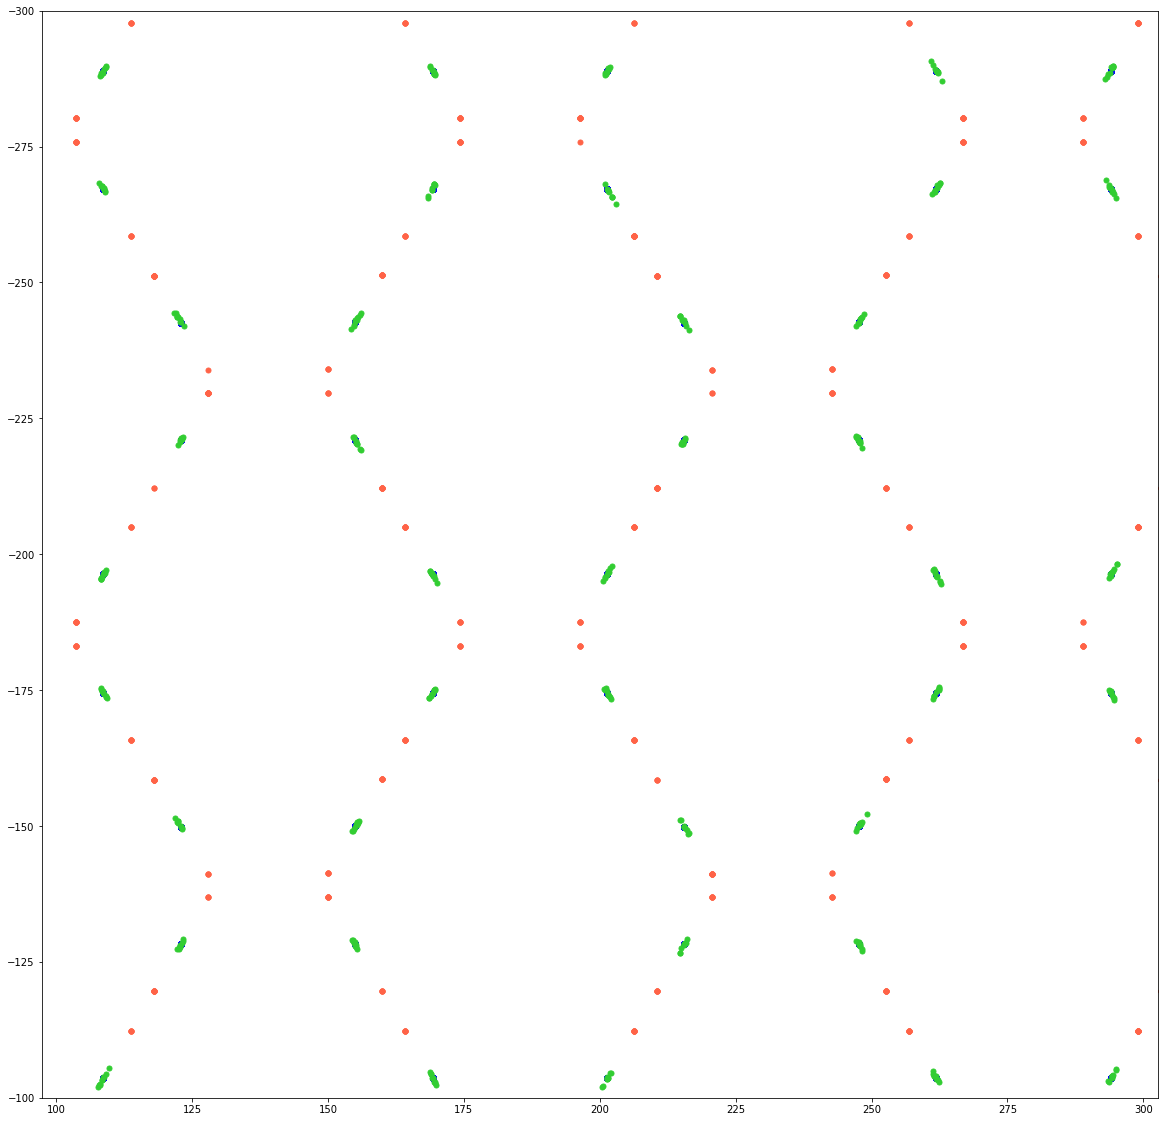

In [18]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type3_v.loc[last_frame].x,type3_v.loc[last_frame].y,'o', color ="blue")
# colloid position
plt.plot(type3_v.loc[last_frame].x+type3_v.loc[last_frame].cx,
         type3_v.loc[last_frame].y+type3_v.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_v.loc[last_frame].x+type3_v.loc[last_frame].dx,
         type3_v.loc[last_frame].y+type3_v.loc[last_frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [19]:
import numpy as np

In [20]:
type3_v['cy']= type3_v['cy']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 <a list of 7 Text xticklabel objects>)

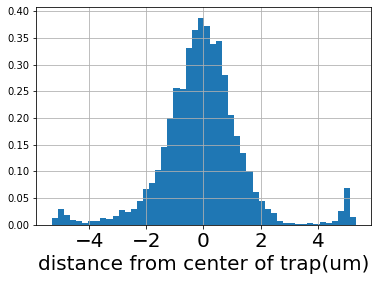

In [21]:
type3_v.loc[last_frame]['cy'].hist(bins = 50, density = 1)
plt.xlabel('distance from center of trap(um)', size = 20)
plt.xticks(size = 20)
#plt.yticks([0,0.1,0.2,0.3,0.4],size = 20)

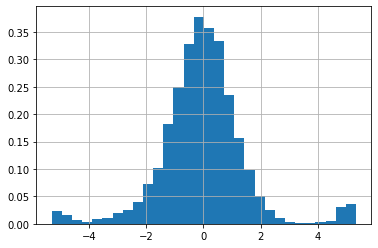

In [23]:
type3_v['cy'].hist(bins = 30,density=1)

(-100, -300)

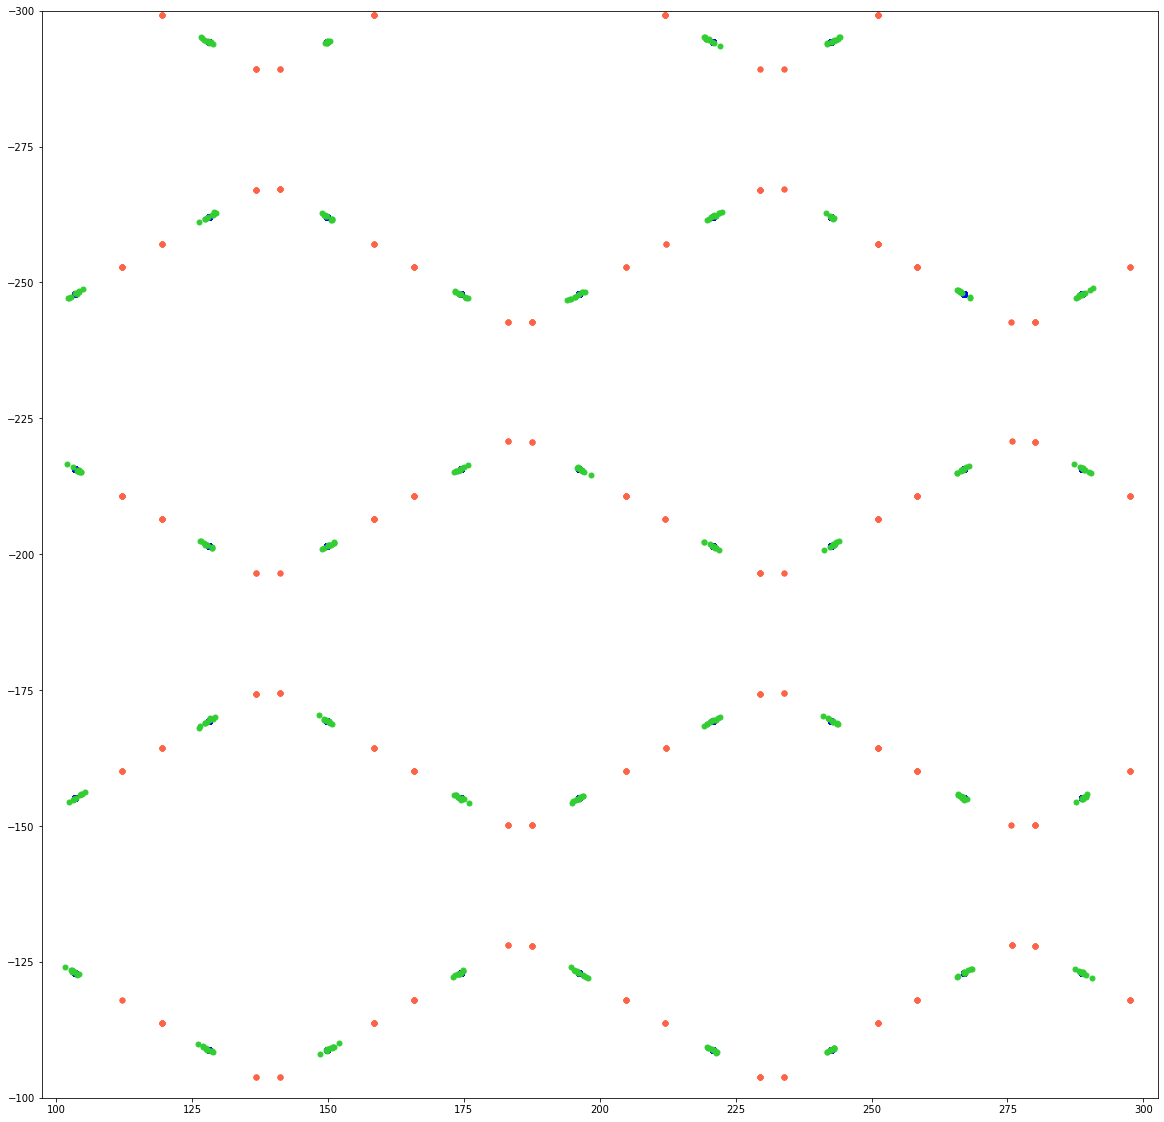

In [24]:
f, (ax1) = plt.subplots(1,1,figsize = (20,20))

# centers
plt.plot(type3_h.loc[last_frame].x,type3_h.loc[last_frame].y,'o', color ="blue")
# colloid positon
plt.plot(type3_h.loc[last_frame].x+type3_h.loc[last_frame].cx,
         type3_h.loc[last_frame].y+type3_h.loc[last_frame].cy, 'o', markersize = 5, color ="limegreen")
# colloid direction
plt.plot(type3_h.loc[last_frame].x+type3_h.loc[last_frame].dx,
         type3_h.loc[last_frame].y+type3_h.loc[last_frame].dy, '.', markersize = 10, color ="tomato")

plt.axis('equal')
plt.xlim(100, 300)
plt.ylim(-100, -300)

In [25]:
type3_h['cx'] = type3_h['cx']/np.cos(30*np.pi/180)

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.axis.YTick at 0x7efcfc7d41d0>,
 <a list of 4 Text yticklabel objects>)

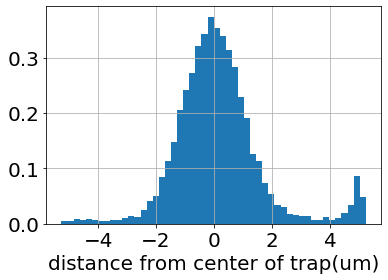

In [29]:
type3_h.loc[last_frame]['cx'].hist(bins = 50,density=1)
plt.xlabel('distance from center of trap(um)', size = 20)
plt.xticks(size = 20)
plt.yticks([0,0.1,0.2,0.3],size = 20)

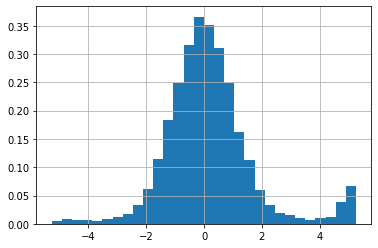

In [27]:
type3_h['cx'].hist(bins = 30,density=1)